In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import koreanize_matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

# font_path = './GmarketSansTTFMedium.ttf'
# font = fm.FontProperties(fname=font_path).get_name()
# print(font)
# rc('font', family=font)

In [2]:
# !pip install koreanize-matplotlib

In [3]:
## 인증키 : 2G5XUDEN750MGRZM37GF
## 개발자료 : https://github.com/WooilJeong/PublicDataReader/blob/main/assets/docs/ecos/ecos.md?utm_source=chatgpt.com

In [4]:
from PublicDataReader import Ecos
service_key = "2G5XUDEN750MGRZM37GF"
api = Ecos(service_key)
df = api.get_statistic_table_list()
df.head()

,상위통계표코드,통계표코드,통계명,시점,검색가능여부,출처
0,*,0000000001,1. 통화/금융,None,N,None
1,0000000001,0000000002,1.1. 통화/유동성,None,N,None
2,0000000002,0000000003,1.1.1. 본원통화,None,N,None
3,0000000003,0000000004,1.1.1.1. 본원통화 구성내역,None,N,None
4,0000000004,102Y004,"1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)",M,Y,None


In [5]:
df[df['통계명'].str.contains('국내총생산')]

,상위통계표코드,통계표코드,통계명,시점,검색가능여부,출처
150,0000000912,0000000914,2.1.2.2. 국내총생산에 대한 지출,None,N,None
151,0000000914,200Y107,"2.1.2.2.1. 국내총생산에 대한 지출(계절조정, 명목, 분기)",Q,Y,None
152,0000000914,200Y108,"2.1.2.2.2. 국내총생산에 대한 지출(계절조정, 실질, 분기)",Q,Y,None
153,0000000914,200Y109,"2.1.2.2.3. 국내총생산에 대한 지출(원계열, 명목, 분기 및 연간)",Q,Y,None
154,0000000914,200Y110,"2.1.2.2.4. 국내총생산에 대한 지출(원계열, 실질, 분기 및 연간)",Q,Y,None
159,0000000915,200Y111,2.1.2.4.1. 경제활동별 국내총생산 디플레이터(분기 및 연간),Q,Y,None
160,0000000915,200Y112,2.1.2.4.2. 국내총생산에 대한 지출 디플레이터(분기 및 연간),Q,Y,None
162,0000000916,0000000917,2.1.3.1. 국내총생산과 지출,None,N,None
163,0000000917,200Y113,"2.1.3.1.1. 국내총생산과 지출(명목, 연간)",A,Y,None
848,0000000444,902Y016,9.1.4.2. 국제 주요국 국내총생산(GDP),A,Y,OECD


### 잠재GDP 와 실제GDP 비교

1️⃣ 코로나 충격 이후 단기적 회복과 GDP 갭
- 2020년 2분기 이후 실질 GDP는 급락
- 잠재 GDP는 장기 추세 기반 → 상대적으로 완만하게 증가
- GDP 격차(GDP gap) 급격히 확대

2️⃣ 격차가 계속 벌어지는 이유
- 잠재 GDP는 장기적 생산능력 추세이므로, 단기 충격에도 거의 변하지 않음
- GDP는 단기 충격 → 일부 회복 불완전
- 한국은행 기준으로 잠재 GDP 추정치는 2019년 이후 완만히 증가
- 코로나 이후 공급 측 요인(노동력 감소, 생산성 변화) 때문에 실질 GDP 회복이 더디게 나타남

3️⃣ 일반적 경제 패턴
- 단기 충격 후 실질 GDP가 잠재 GDP 아래에 오래 머무르는 건 흔함
- 격차가 장기화되면 실질 GDP가 잠재 수준까지 완전히 회복하지 못했다고 해석
- 정책적 대응(재정, 통화)과 글로벌 공급망 회복 속도에 따라 격차 지속 기간 결정

4 경제학적 의미
- 실질 GDP < 잠재 GDP → 경기 하강, 경제가 완전 고용/잠재력 이하로 운용
- 이런 상황에서는 경기 부양 정책 필요


In [6]:
df_nominal_gdp = api.get_statistic_search(통계표코드="200Y107", 주기="Q", 검색시작일자="2010Q1", 검색종료일자="2025Q4")
df_real_gdp = api.get_statistic_search(통계표코드="200Y108", 주기="Q", 검색시작일자="2010Q1", 검색종료일자="2025Q4")
#pd.pivot(data=df, index=['통계항목코드1', '통계항목명1'], columns='시점', values='값')

In [7]:
df_nominal_tot = df_nominal_gdp[df_nominal_gdp['통계항목명1'] == '국내총생산에 대한 지출'][['시점', '값']].rename(columns={'시점':'Q', '값':'nominal_GDP'})
df_real_tot = df_real_gdp[df_real_gdp['통계항목명1'] == '국내총생산에 대한 지출'][['시점', '값']].rename(columns={'시점':'Q', '값':'real_GDP'})
df_comp_tot = df_nominal_tot.merge(df_real_tot, on='Q')
df_comp_tot['nominal_GDP'] = df_comp_tot['nominal_GDP'].astype(float)
df_comp_tot['real_GDP'] = df_comp_tot['real_GDP'].astype(float)
df_comp_tot

,Q,nominal_GDP,real_GDP
0,2010Q1,334477.3,386238.5
1,2010Q2,343685.5,392479.0
2,2010Q3,347423.4,396469.6
3,2010Q4,353874.0,402066.0
4,2011Q1,355795.0,405904.8
...,...,...,...
57,2024Q2,638175.4,572357.1
58,2024Q3,635086.8,572866.1
59,2024Q4,650046.5,573311.8
60,2025Q1,647226.7,572057.7


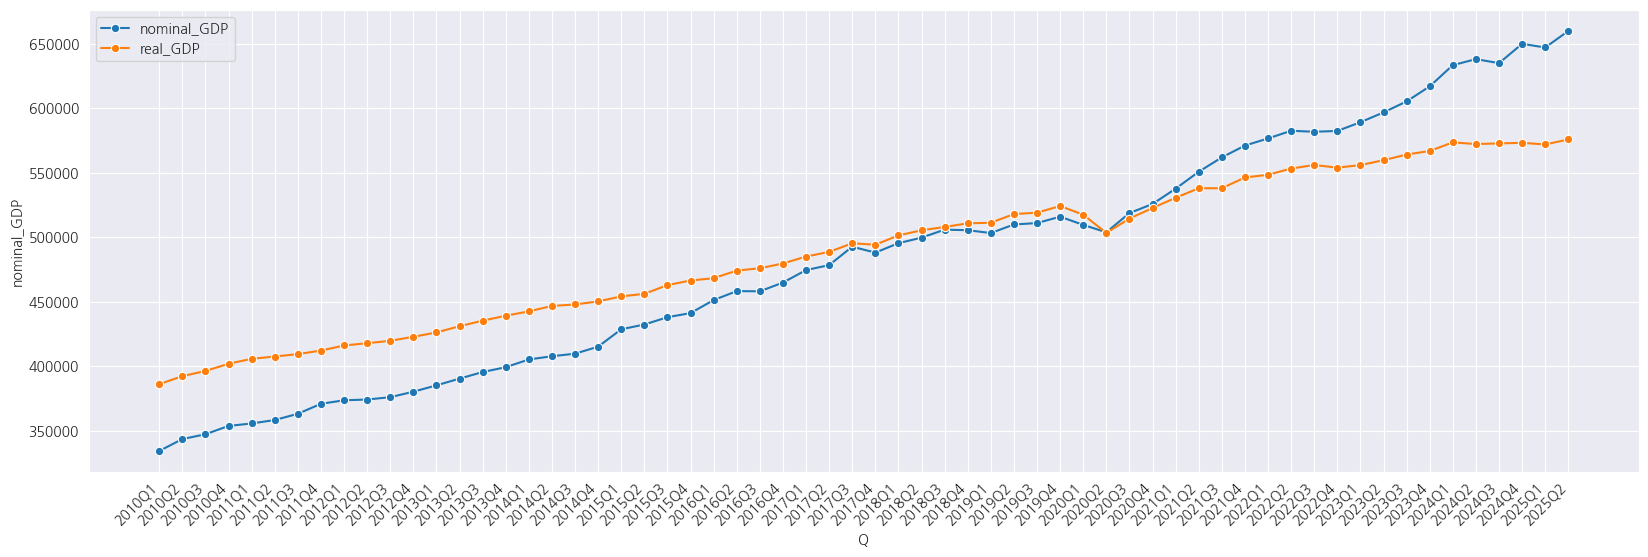

In [8]:
# 두 컬럼을 직접 라인으로 그림
plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="Q", y="nominal_GDP", data=df_comp_tot, label="nominal_GDP", marker='o')
sns.lineplot(x="Q", y="real_GDP", data=df_comp_tot, label="real_GDP", marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- 최종소비지출 = 가계 + 정부 + 비영리단체 소비
- 총자본형성 = 설비/건석/지식재산 투자 + 재고변화
- 재화와 서비스 수출 = 수출
- (공제) 재화와 서비스 수입 = 수입
- 통계상 불일치 = 계산상의 오차

In [9]:
list_target_cols = ['최종소비지출', '총자본형성', '재화와 서비스의 수출', '(공제)재화와 서비스의 수입', '통계상 불일치']
df_nominal_tot = df_nominal_gdp[df_nominal_gdp['통계항목명1'].isin(list_target_cols)][['통계항목명1', '시점', '값']]\
    .rename(columns={'통계항목명1':'var', '시점':'Q', '값':'nominal_GDP'})
df_real_tot = df_real_gdp[df_real_gdp['통계항목명1'].isin(list_target_cols)][['통계항목명1', '시점', '값']]\
    .rename(columns={'통계항목명1':'var', '시점':'Q', '값':'real_GDP'})

df_comp_tot = df_nominal_tot.merge(df_real_tot, on=['var', 'Q'])
df_comp_tot['nominal_GDP'] = df_comp_tot['nominal_GDP'].astype(float)
df_comp_tot['real_GDP'] = df_comp_tot['real_GDP'].astype(float)
df_comp_tot.head()

,var,Q,nominal_GDP,real_GDP
0,최종소비지출,2010Q1,217596.9,258632.3
1,총자본형성,2010Q1,112987.6,124997.1
2,재화와 서비스의 수출,2010Q1,141352.8,117490.5
3,(공제)재화와 서비스의 수입,2010Q1,137612.2,110999.3
4,통계상 불일치,2010Q1,152.2,188.2


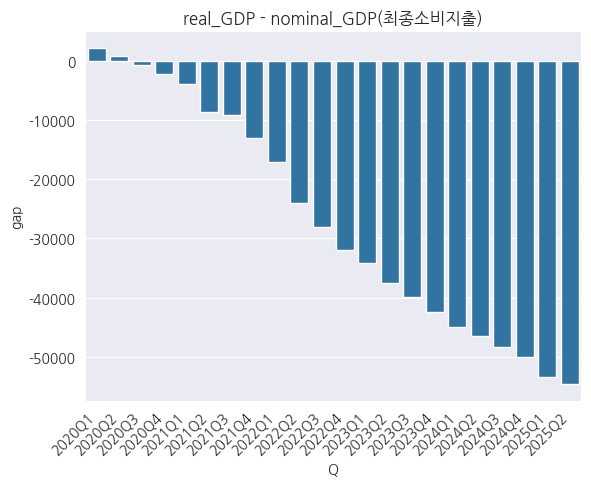

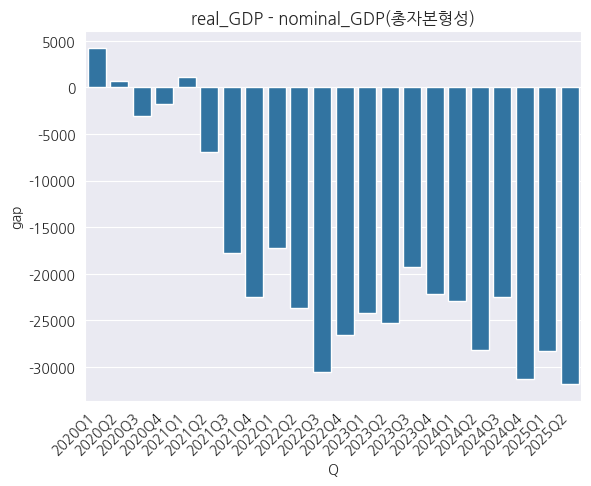

In [10]:
df_comp_after_2020 = df_comp_tot[(df_comp_tot['Q'] >= '2020Q1') & (df_comp_tot['var'].isin(['최종소비지출', '총자본형성']))].copy()
df_comp_after_2020['gap'] = df_comp_after_2020['real_GDP'] - df_comp_after_2020['nominal_GDP']

sns.barplot(x='Q', y='gap', data=df_comp_after_2020[df_comp_after_2020['var'] == '최종소비지출'])
plt.title('real_GDP - nominal_GDP(최종소비지출)')
plt.xticks(rotation=45, ha='right')
plt.show()


sns.barplot(x='Q', y='gap', data=df_comp_after_2020[df_comp_after_2020['var'] == '총자본형성'])
plt.title('real_GDP - nominal_GDP(총자본형성)')
plt.xticks(rotation=45, ha='right')
plt.show()

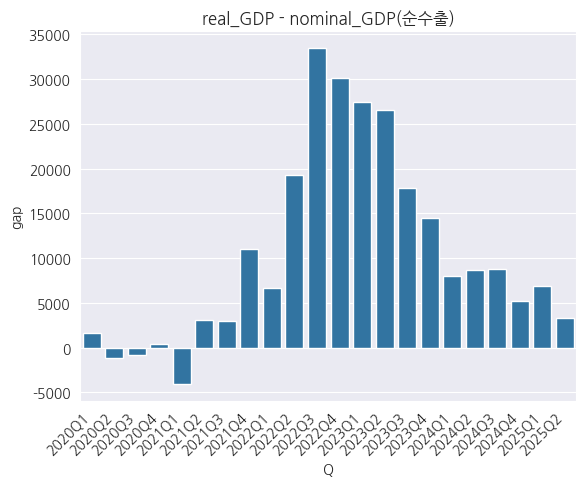

In [11]:
df_comp_after_2020 = df_comp_tot[(df_comp_tot['Q'] >= '2020Q1') & (df_comp_tot['var'].isin(['재화와 서비스의 수출', '(공제)재화와 서비스의 수입']))].copy()
df_comp_after_2020_n = pd.pivot(data=df_comp_after_2020, index='Q', columns='var', values='nominal_GDP')
df_comp_after_2020_n['nominal_gap_순수출'] = df_comp_after_2020_n['재화와 서비스의 수출'] - df_comp_after_2020_n['(공제)재화와 서비스의 수입']
df_comp_after_2020_r = pd.pivot(data=df_comp_after_2020, index='Q', columns='var', values='real_GDP')
df_comp_after_2020_r['real_gap_순수출'] = df_comp_after_2020_r['재화와 서비스의 수출'] - df_comp_after_2020_r['(공제)재화와 서비스의 수입']
df_comp_after_2020 = df_comp_after_2020_n[['nominal_gap_순수출']].join(df_comp_after_2020_r[['real_gap_순수출']])
df_comp_after_2020['gap'] = df_comp_after_2020['real_gap_순수출'] - df_comp_after_2020['nominal_gap_순수출']


sns.barplot(x='Q', y='gap', data=df_comp_after_2020)
plt.title('real_GDP - nominal_GDP(순수출)')
plt.xticks(rotation=45, ha='right')
plt.show()

- 실질 수출이 증가 중이라 “외형상”은 회복처럼 보이지만, 그 속을 들여다보면 “단가 하락”이나 “수입 급증” 때문에 GDP 기여도가 낮아지고 있는 구조예요.
- 특히 **2020년 이후 에너지 수입(전력·LNG·정유 등)**이 크게 늘었고, 반면 반도체 수출 단가는 2022년 이후 하락했죠. 이게 실질 순수출 갭을 깎는 주된 원인입니다.
- ‘실제 무역활동’은 늘고 있지만, 경제가 잠재적으로 낼 수 있는 무역기여도보다 못 미친다는 뜻이에요.
- 수출이 수입한테 따라 잡힘

In [12]:
df_comp_after_2020_r['cumsum_(공제)재화와 서비스의 수입'] = df_comp_after_2020_r['(공제)재화와 서비스의 수입'].cumsum()
df_comp_after_2020_r['cumsum_재화와 서비스의 수출'] = df_comp_after_2020_r['재화와 서비스의 수출'].cumsum()
df_comp_after_2020_r['prev_(공제)재화와 서비스의 수입'] = df_comp_after_2020_r['cumsum_(공제)재화와 서비스의 수입'].shift(1)
df_comp_after_2020_r['prev_재화와 서비스의 수출'] = df_comp_after_2020_r['cumsum_재화와 서비스의 수출'].shift(1)
df_comp_after_2020_r['import'] = ((df_comp_after_2020_r['cumsum_(공제)재화와 서비스의 수입'] / df_comp_after_2020_r['prev_(공제)재화와 서비스의 수입']) -1) * 100
df_comp_after_2020_r['export'] = ((df_comp_after_2020_r['cumsum_재화와 서비스의 수출'] / df_comp_after_2020_r['prev_재화와 서비스의 수출']) -1) * 100
df_comp_after_2020_r.head()

var,(공제)재화와 서비스의 수입,재화와 서비스의 수출,real_gap_순수출,cumsum_(공제)재화와 서비스의 수입,cumsum_재화와 서비스의 수출,prev_(공제)재화와 서비스의 수입,prev_재화와 서비스의 수출,import,export
Q,,,,,,,,,
2020Q1,161264.5,183226.6,21962.1,161264.5,183226.6,NaN,NaN,NaN,NaN
2020Q2,153090.7,158622.0,5531.3,314355.2,341848.6,161264.5,183226.6,94.931433,86.571491
2020Q3,160689.5,181765.4,21075.9,475044.7,523614.0,314355.2,341848.6,51.117176,53.171316
2020Q4,161634.0,188928.2,27294.2,636678.7,712542.2,475044.7,523614.0,34.025009,36.081579
2021Q1,170130.4,194888.2,24757.8,806809.1,907430.4,636678.7,712542.2,26.721547,27.351110


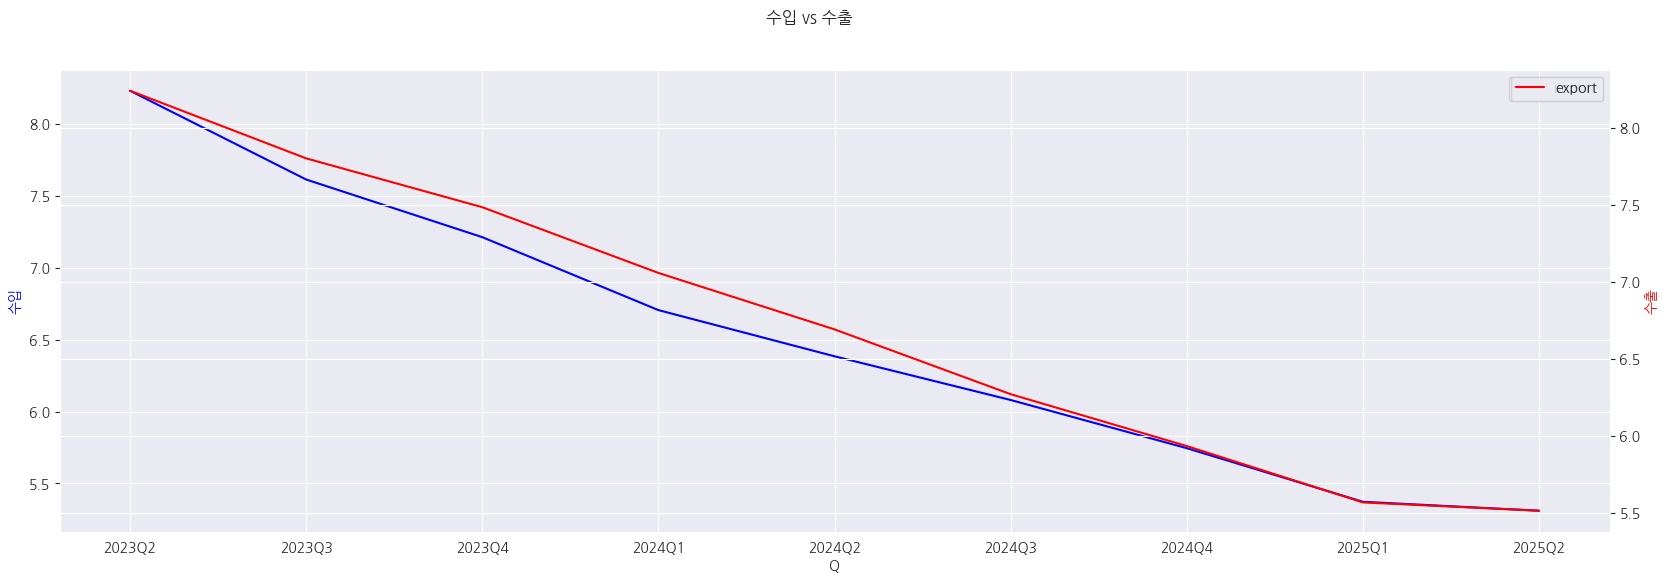

In [13]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.lineplot(x=df_comp_after_2020_r[df_comp_after_2020_r.index > '2023Q1'].index, y=df_comp_after_2020_r[df_comp_after_2020_r.index > '2023Q1']["import"], ax=ax1, label="import", color='blue')
ax1.set_ylabel('수입', color='blue')

ax2 = ax1.twinx()
sns.lineplot(x=df_comp_after_2020_r[df_comp_after_2020_r.index > '2023Q1'].index, y=df_comp_after_2020_r[df_comp_after_2020_r.index > '2023Q1']["export"], ax=ax2, label="export", color='red')
ax2.set_ylabel('수출', color='red')

fig.suptitle('수입 vs 수출')
plt.show()

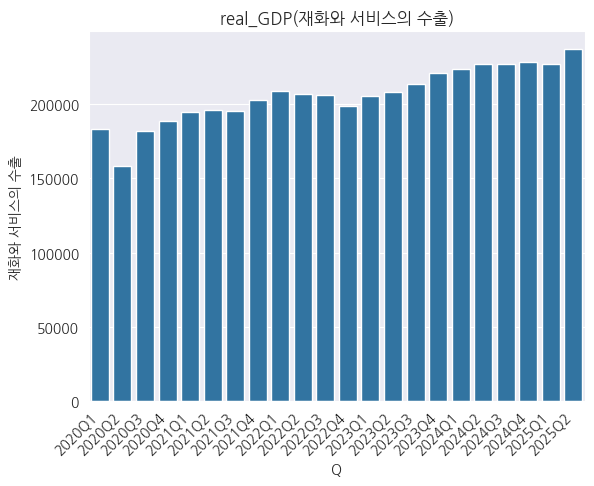

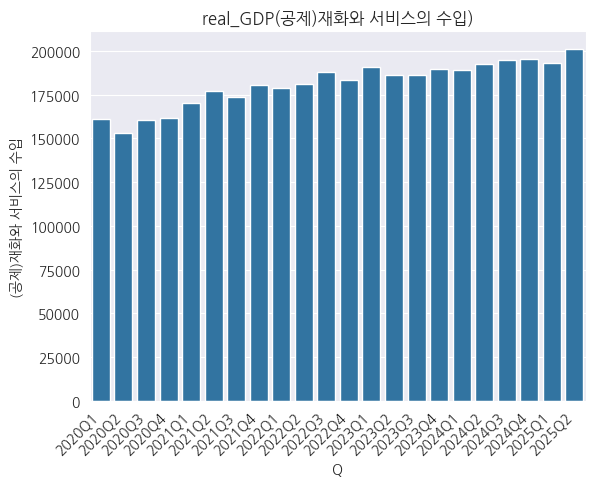

In [14]:
sns.barplot(x='Q', y='재화와 서비스의 수출', data=df_comp_after_2020_r)
plt.title('real_GDP(재화와 서비스의 수출)')
plt.xticks(rotation=45, ha='right')
plt.show()

sns.barplot(x='Q', y='(공제)재화와 서비스의 수입', data=df_comp_after_2020_r)
plt.title('real_GDP(공제)재화와 서비스의 수입)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 경제적 해석
- 전체 GDP gap = 소비_gap + 투자_gap + 순수출_gap + 통계상 불일치
- 지금 패턴은 “내수 부진 → GDP 회복 제한” + “수출 호조 → 부분적 회복” 구조
- 정책 시사점:
    + 내수 활성화 필요 → 재정·통화정책으로 소비·투자 촉진
    + 수출 호조는 긍정적이지만, 내수 불균형은 장기적 성장 잠재력 제한

---

In [15]:
df_nominal_gdp['통계항목명1'].unique()

array(['최종소비지출', '민간', '가계', '가계에 봉사하는 비영리단체', '정부', '총자본형성', '총고정자본형성',
       '건설투자', '설비투자', '지식재산생산물투자', '총고정자본형성(민간)', '총고정자본형성(정부)',
       '재고증감 및 귀중품 순취득', '재화와 서비스의 수출', '(재화)F.O.B. 기준', '(서비스)',
       '(공제)재화와 서비스의 수입', '통계상 불일치', '국내총생산에 대한 지출'], dtype=object)

### 세부적 분석
- 소비와 투자는 어디 부분에서 떨어지고 있는가?
- 수출은 어디에서 잘 되고 있는가?

### 최종소비자지출
- 가계, 가계에 봉사하는 비영리단체, 정부
- 가계 소비가 잠재보다 낮다면 소비심리위축 이나 가처분소득 감소때문

In [16]:
list_target_cols = ['가계', '가계에 봉사하는 비영리단체', '정부']

df_nominal_tot = df_nominal_gdp[df_nominal_gdp['통계항목명1'].isin(list_target_cols)][['통계항목명1', '시점', '값']]\
    .rename(columns={'통계항목명1':'var', '시점':'Q', '값':'nominal_GDP'})
df_real_tot = df_real_gdp[df_real_gdp['통계항목명1'].isin(list_target_cols)][['통계항목명1', '시점', '값']]\
    .rename(columns={'통계항목명1':'var', '시점':'Q', '값':'real_GDP'})

df_comp_tot = df_nominal_tot.merge(df_real_tot, on=['var', 'Q'])
df_comp_tot['nominal_GDP'] = df_comp_tot['nominal_GDP'].astype(float)
df_comp_tot['real_GDP'] = df_comp_tot['real_GDP'].astype(float)
df_comp_tot['gap_GDP'] = df_comp_tot['real_GDP'] - df_comp_tot['nominal_GDP']

df_comp_tot = df_comp_tot[df_comp_tot['Q'] >= '2017Q1']
df_comp_tot.head()

,var,Q,nominal_GDP,real_GDP,gap_GDP
84,가계,2017Q1,222886.2,231116.0,8229.8
85,가계에 봉사하는 비영리단체,2017Q1,8775.3,9035.7,260.4
86,정부,2017Q1,68734.4,72591.9,3857.5
87,가계,2017Q2,225821.9,233744.0,7922.1
88,가계에 봉사하는 비영리단체,2017Q2,9333.0,9400.4,67.4


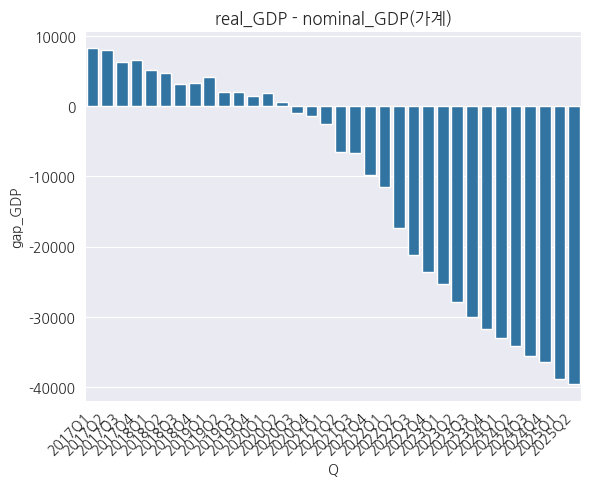

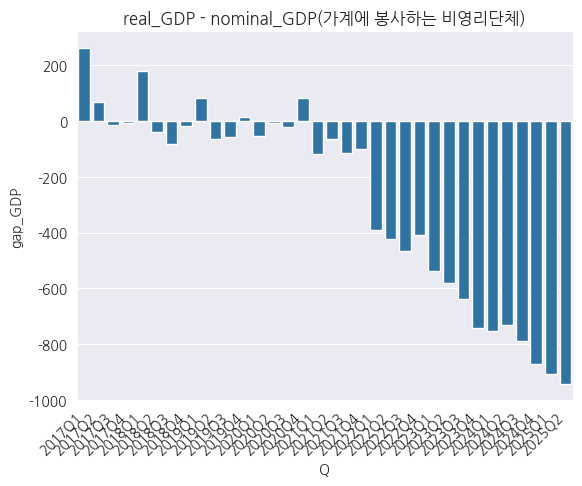

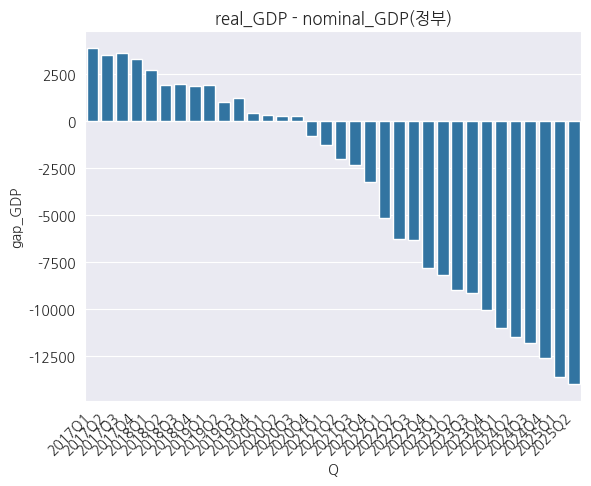

In [17]:
sns.barplot(x='Q', y='gap_GDP', data=df_comp_tot[df_comp_tot['var'] == '가계'])
plt.title('real_GDP - nominal_GDP(가계)')
plt.xticks(rotation=45, ha='right')
plt.show()


sns.barplot(x='Q', y='gap_GDP', data=df_comp_tot[df_comp_tot['var'] == '가계에 봉사하는 비영리단체'])
plt.title('real_GDP - nominal_GDP(가계에 봉사하는 비영리단체)')
plt.xticks(rotation=45, ha='right')
plt.show()


sns.barplot(x='Q', y='gap_GDP', data=df_comp_tot[df_comp_tot['var'] == '정부'])
plt.title('real_GDP - nominal_GDP(정부)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 총자본형성
- 건설투자, 설비투자, 지식재산생산물투자, 민간 / 정부 구분 가능, 재고증감 및 귀중품 순취득
- 설비투자가 많이 낮으면 제조업 경기 둔화, 건설투자가 낮으면 부동산/인프라 투자 부진
- 지식재산생산물투자 낮으면 소프트웨어 투자 축소 → 디지털 전환 속도 늦음, 투자 축소 → 신기술, 신제품 개발 지연, 라이선스 감소 → 기술 경쟁력 약화 ==> 장기경쟁력에 악영향

In [18]:
list_target_cols = ['건설투자', '설비투자', '지식재산생산물투자']

df_nominal_tot = df_nominal_gdp[df_nominal_gdp['통계항목명1'].isin(list_target_cols)][['통계항목명1', '시점', '값']]\
    .rename(columns={'통계항목명1':'var', '시점':'Q', '값':'nominal_GDP'})
df_real_tot = df_real_gdp[df_real_gdp['통계항목명1'].isin(list_target_cols)][['통계항목명1', '시점', '값']]\
    .rename(columns={'통계항목명1':'var', '시점':'Q', '값':'real_GDP'})

df_comp_tot = df_nominal_tot.merge(df_real_tot, on=['var', 'Q'])
df_comp_tot['nominal_GDP'] = df_comp_tot['nominal_GDP'].astype(float)
df_comp_tot['real_GDP'] = df_comp_tot['real_GDP'].astype(float)
df_comp_tot['gap_GDP'] = df_comp_tot['real_GDP'] - df_comp_tot['nominal_GDP']

df_comp_tot = df_comp_tot[df_comp_tot['Q'] >= '2017Q1']
df_comp_tot.head()

,var,Q,nominal_GDP,real_GDP,gap_GDP
84,건설투자,2017Q1,74514.1,80298.7,5784.6
85,설비투자,2017Q1,48559.2,49728.5,1169.3
86,지식재산생산물투자,2017Q1,26947.2,28963.6,2016.4
87,건설투자,2017Q2,75071.0,81012.8,5941.8
88,설비투자,2017Q2,50161.6,51294.2,1132.6


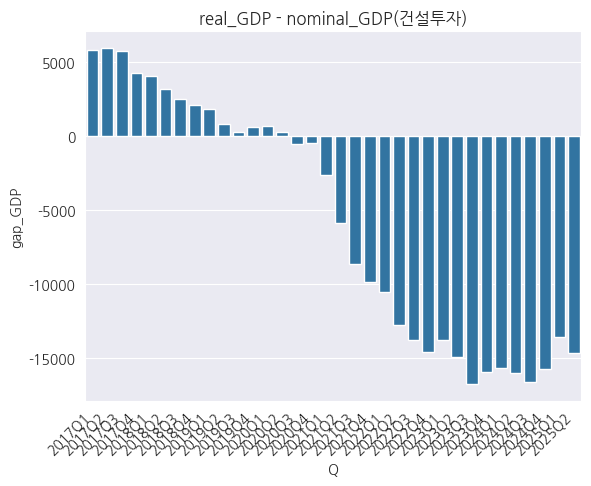

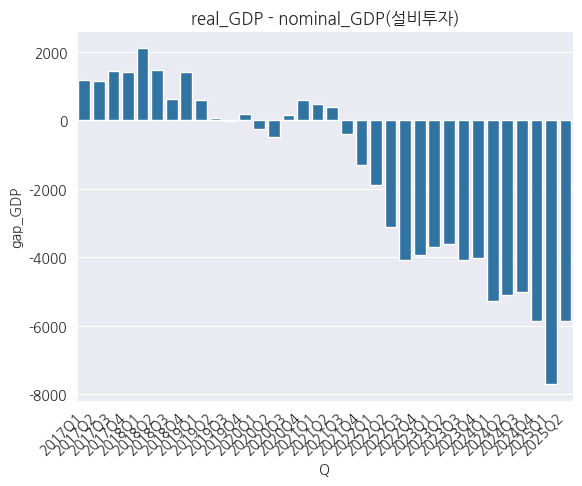

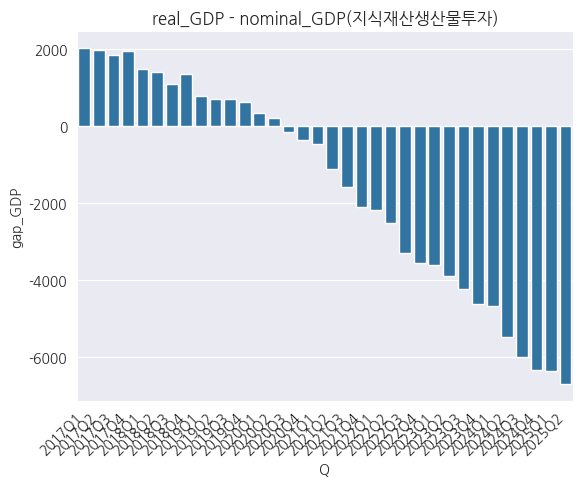

In [19]:
sns.barplot(x='Q', y='gap_GDP', data=df_comp_tot[df_comp_tot['var'] == '건설투자'])
plt.title('real_GDP - nominal_GDP(건설투자)')
plt.xticks(rotation=45, ha='right')
plt.show()


sns.barplot(x='Q', y='gap_GDP', data=df_comp_tot[df_comp_tot['var'] == '설비투자'])
plt.title('real_GDP - nominal_GDP(설비투자)')
plt.xticks(rotation=45, ha='right')
plt.show()


sns.barplot(x='Q', y='gap_GDP', data=df_comp_tot[df_comp_tot['var'] == '지식재산생산물투자'])
plt.title('real_GDP - nominal_GDP(지식재산생산물투자)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 순수출
- 재화(F.O.B 기준), 서비스, 재화와 서비스 수입
- 경제 전체적으로 실질 GDP가 잠재 GDP보다 낮다는 건 생산능력(잠재치)에 비해 실제 수요·생산이 못 따라간다는 뜻
- 통신업하고 컴퓨터,전자 및 광학기기 제조업만 잠재보다 실질이 높음
    + 통신업 : 비대, 모바일 데이터 전환, 글로벌 ICT
    + 전자 및 광학기기 제조업 : 반도체, 데이터센터

3️⃣ 다른 산업은 왜 잠재 > 실질일까?
- 소비·투자 부진
- 위축, 고금리, 물가 상승 → 소비·설비투자 못 따라감
- 제조업 (자동차·철강·기계 등)
- 공급망 충격, 친환경 규제 부담
- 서비스업 (관광·항공·대면 서비스)
- 코로나 충격에서 회복이 늦음


In [20]:
df_nominal_gdp = api.get_statistic_search(통계표코드="200Y103", 주기="Q", 검색시작일자="2010Q1", 검색종료일자="2025Q3")
df_real_gdp = api.get_statistic_search(통계표코드="200Y104", 주기="Q", 검색시작일자="2010Q1", 검색종료일자="2025Q3")

df_nominal_tot = df_nominal_gdp[['통계항목명1', '시점', '값']]\
    .rename(columns={'통계항목명1':'var', '시점':'Q', '값':'nominal_GDP'})
df_real_tot = df_real_gdp[['통계항목명1', '시점', '값']]\
    .rename(columns={'통계항목명1':'var', '시점':'Q', '값':'real_GDP'})

df_comp_tot = df_nominal_tot.merge(df_real_tot, on=['var', 'Q'])
df_comp_tot['nominal_GDP'] = df_comp_tot['nominal_GDP'].astype(float)
df_comp_tot['real_GDP'] = df_comp_tot['real_GDP'].astype(float)
df_comp_tot['gap_GDP'] = df_comp_tot['real_GDP'] - df_comp_tot['nominal_GDP']

df_comp_tot = df_comp_tot[df_comp_tot['Q'] >= '2017Q1']

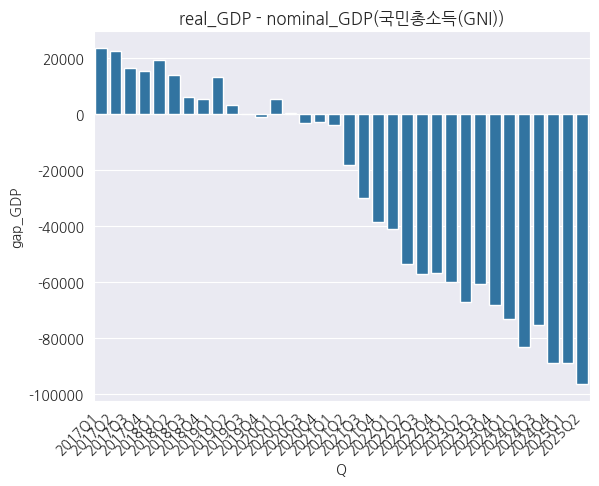

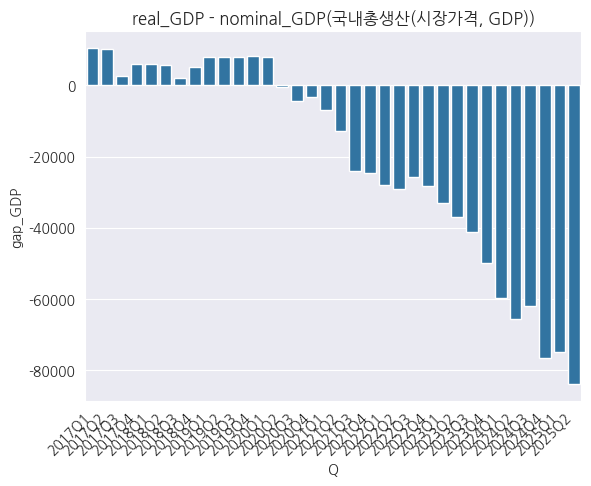

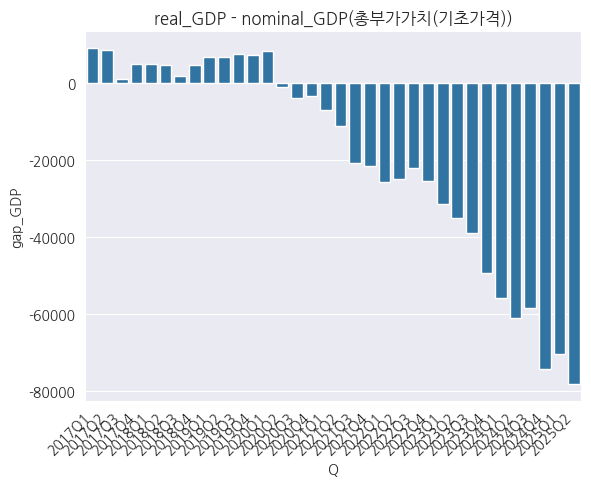

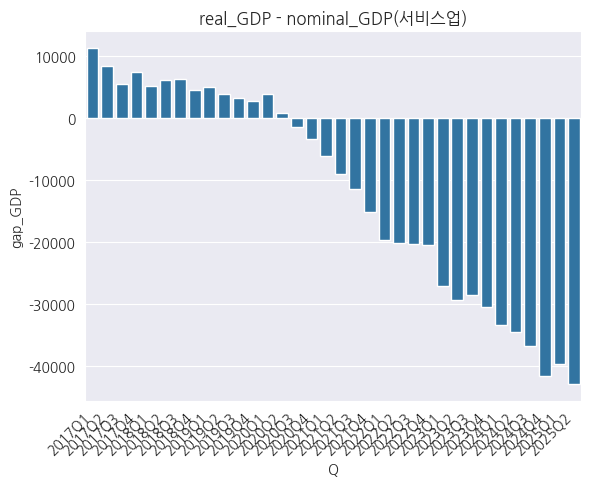

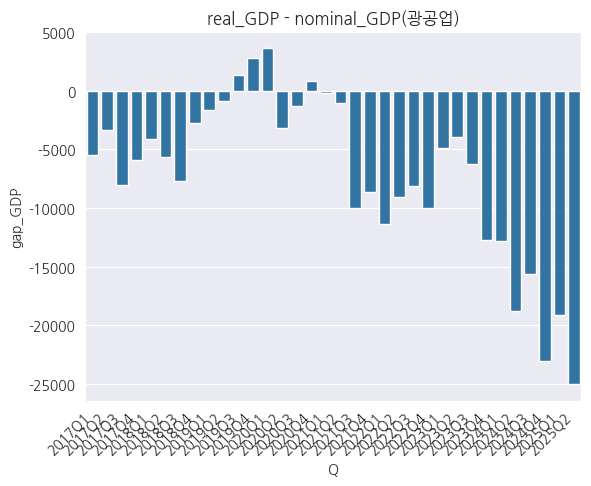

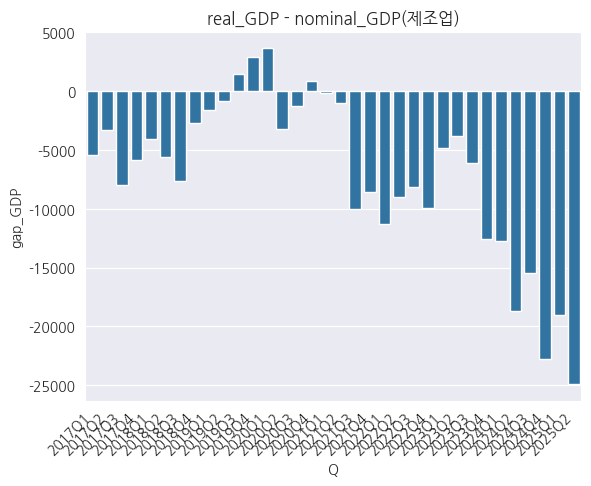

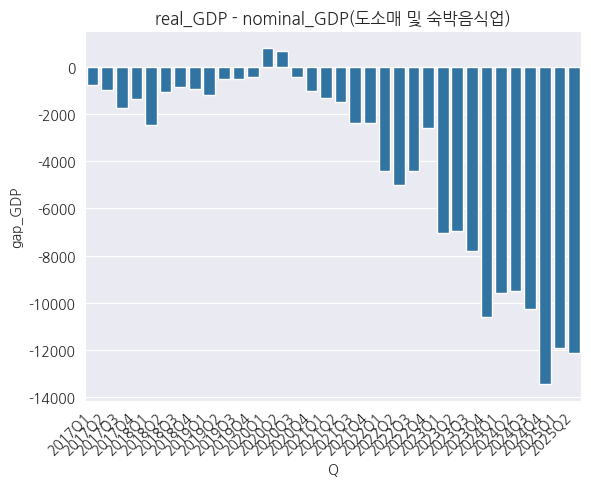

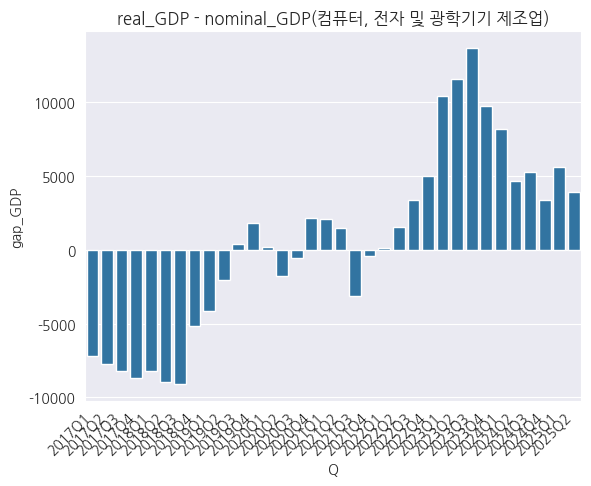

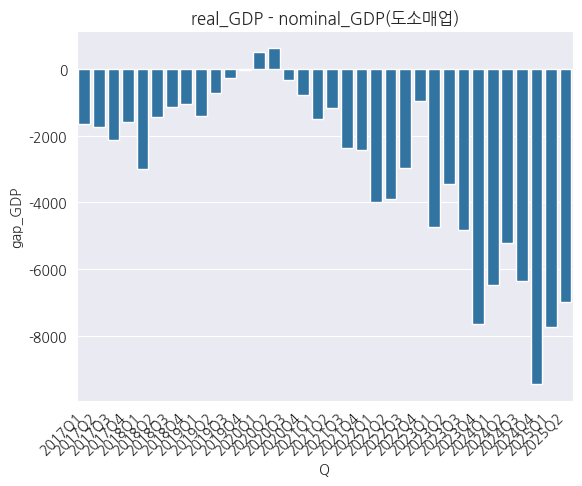

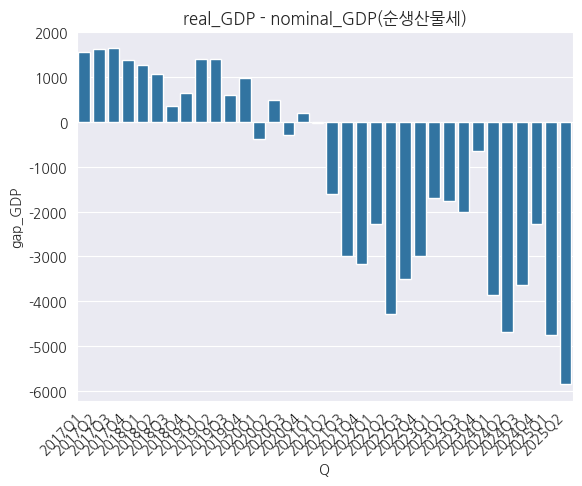

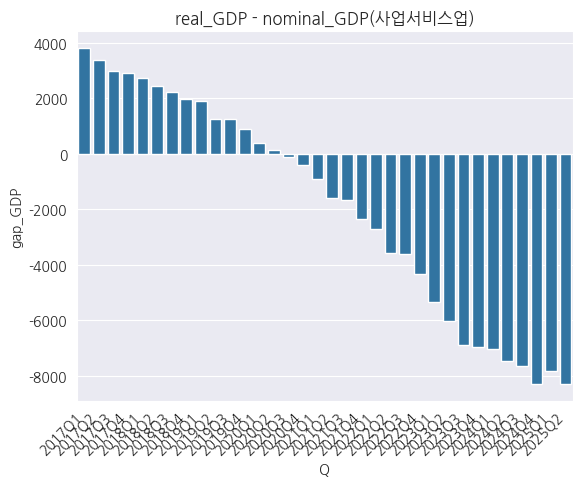

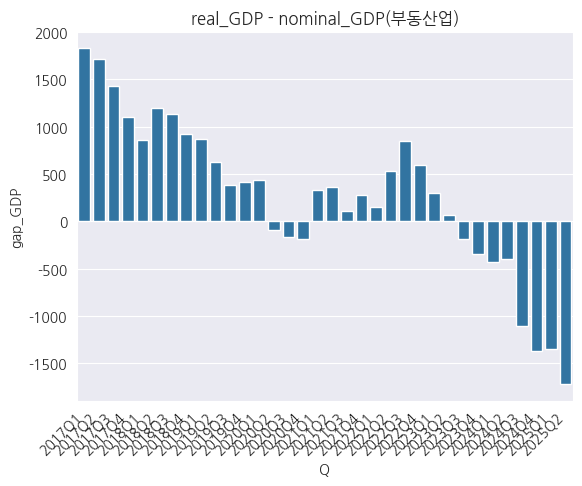

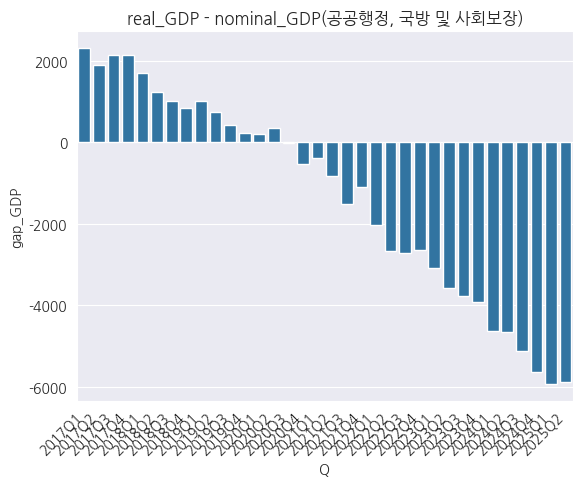

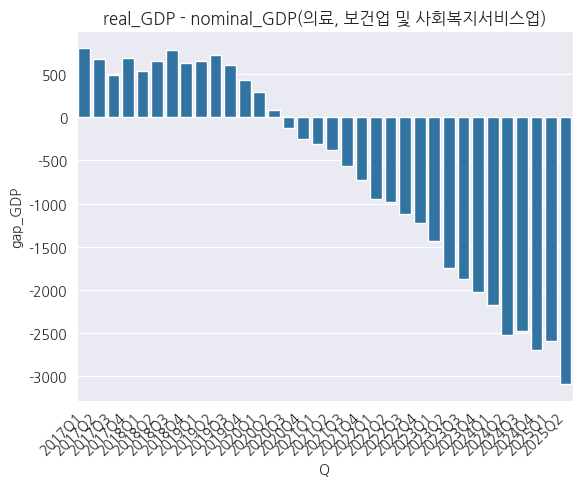

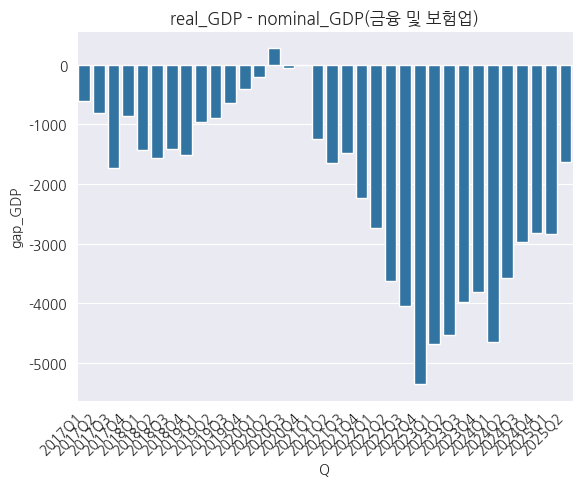

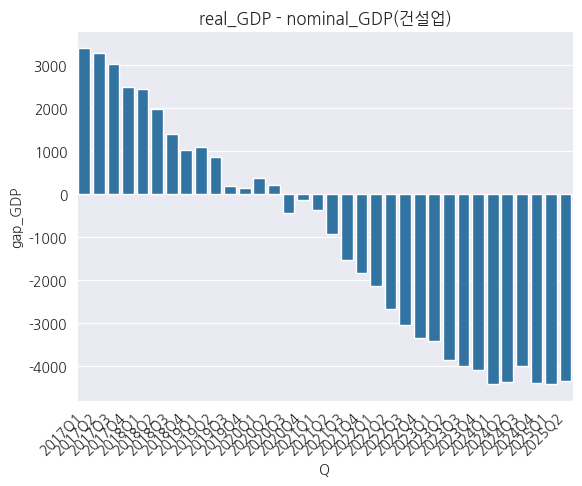

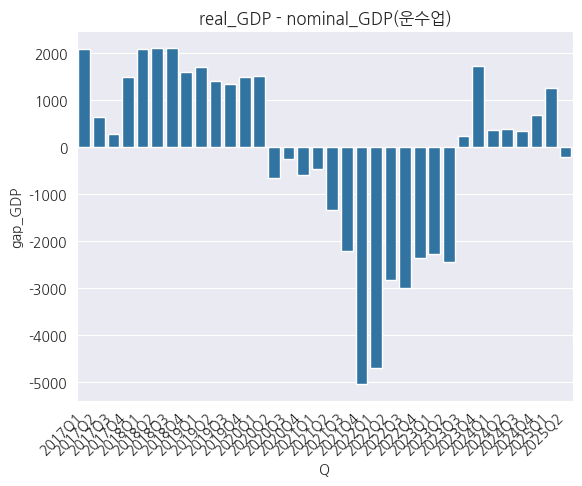

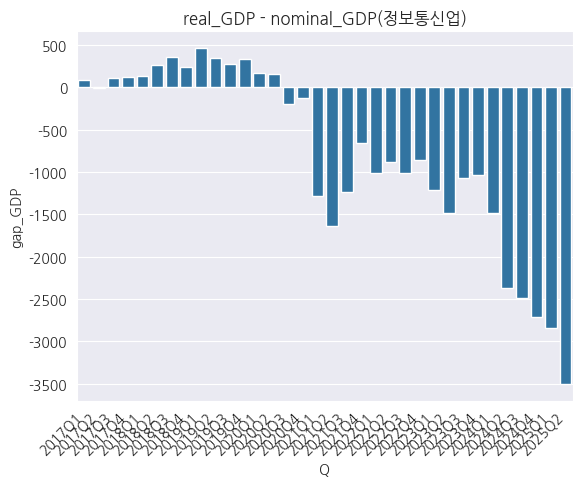

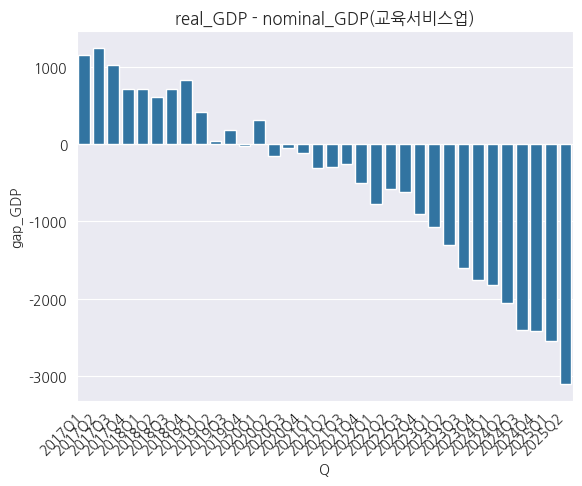

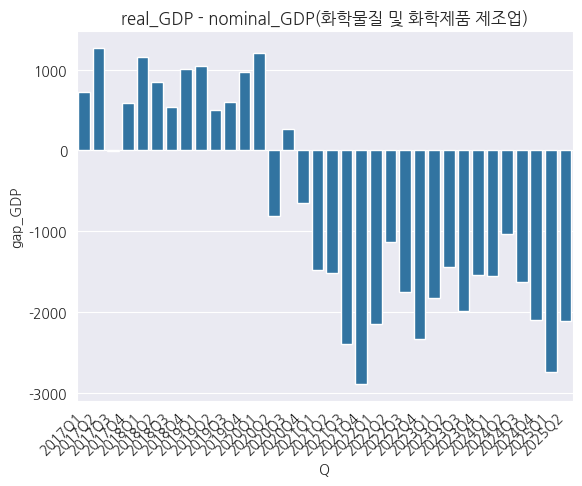

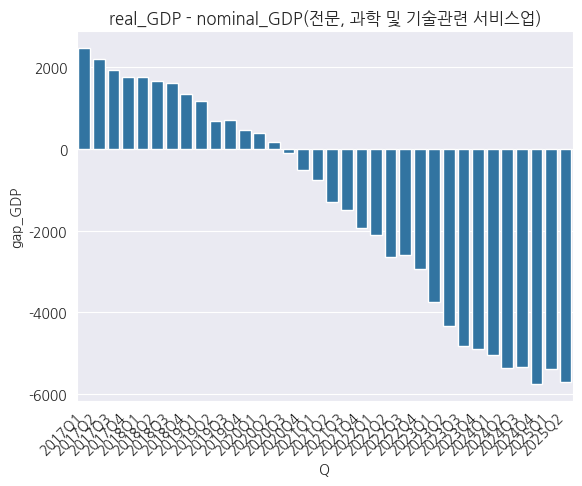

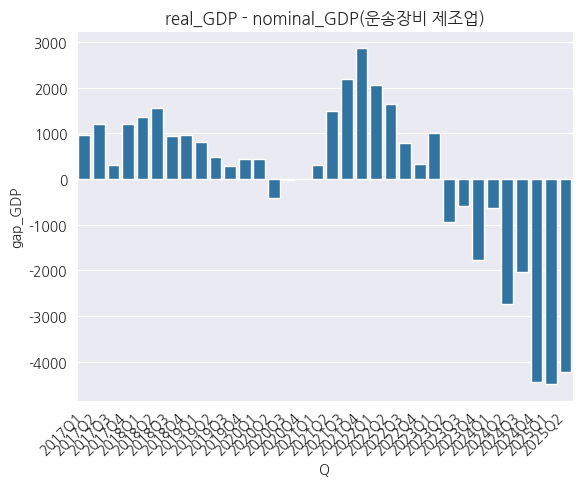

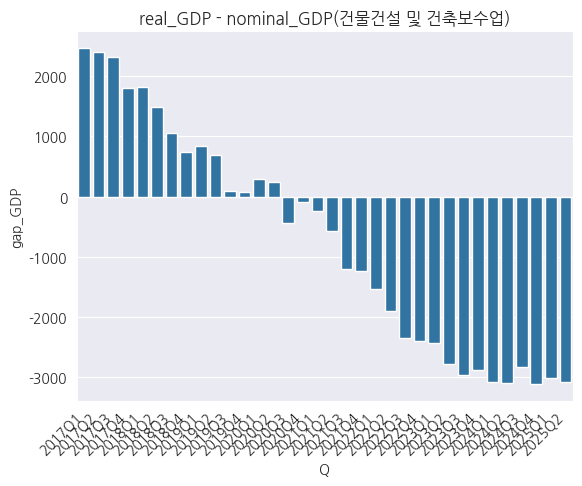

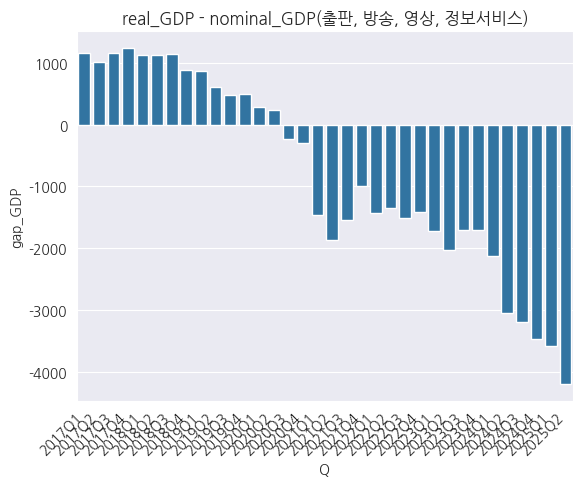

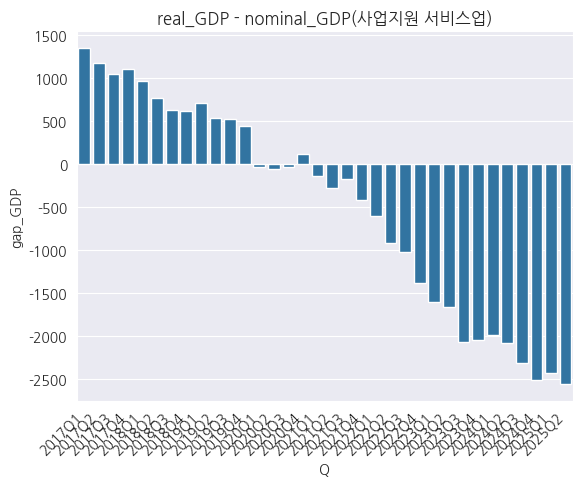

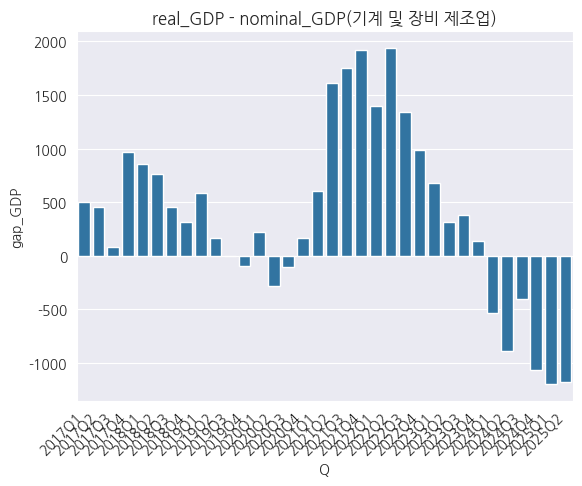

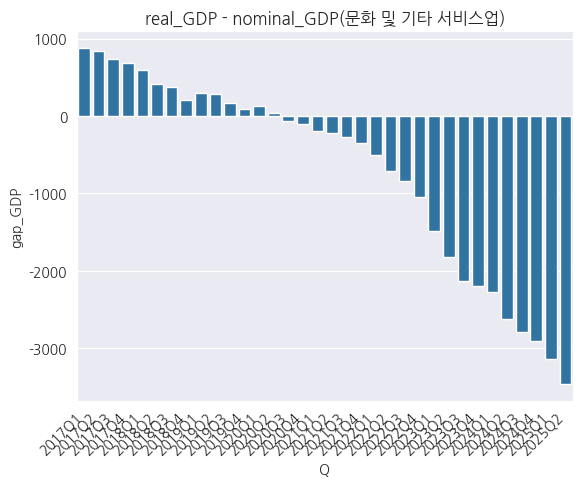

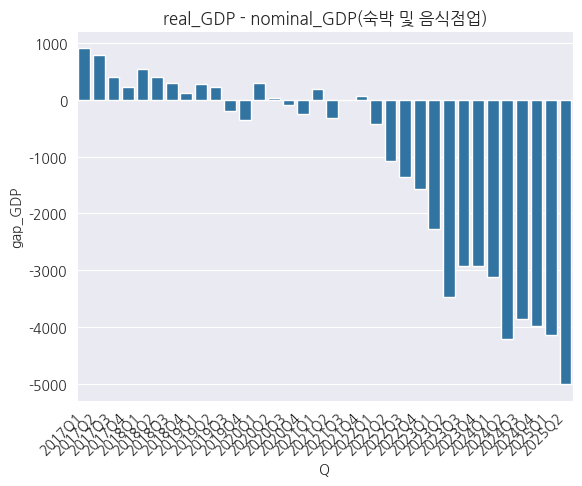

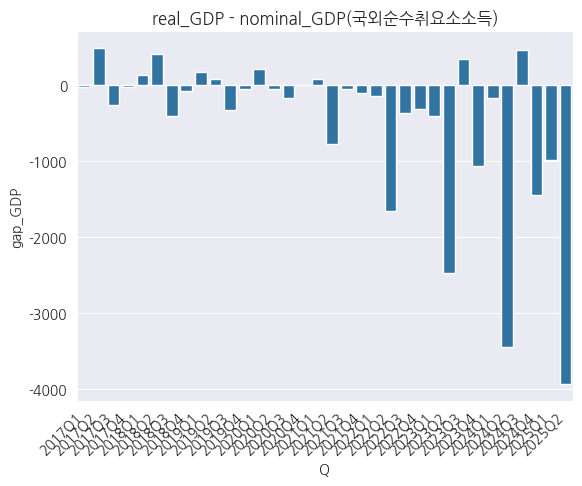

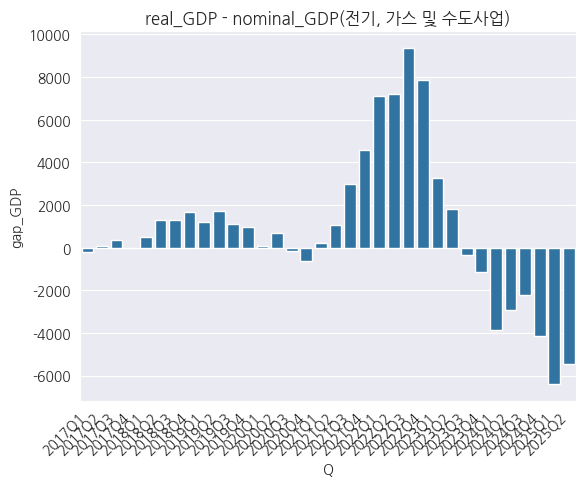

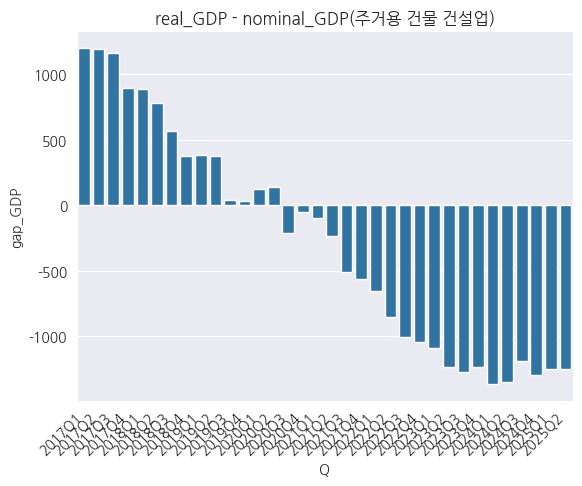

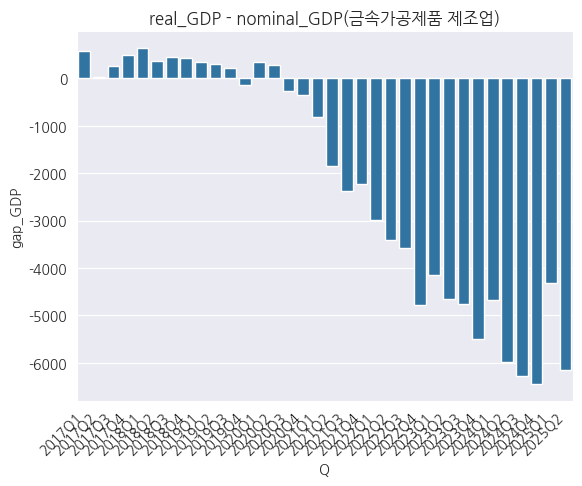

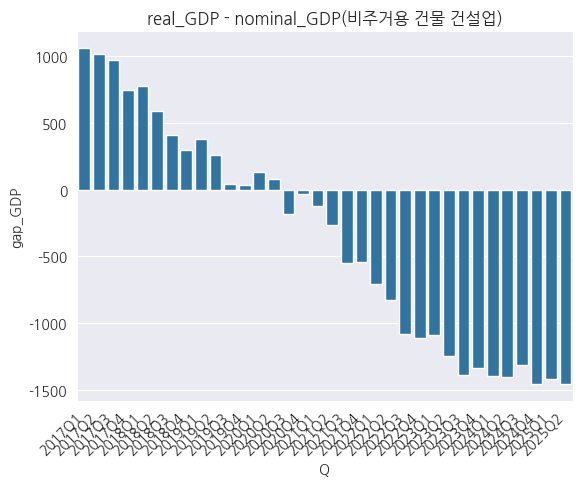

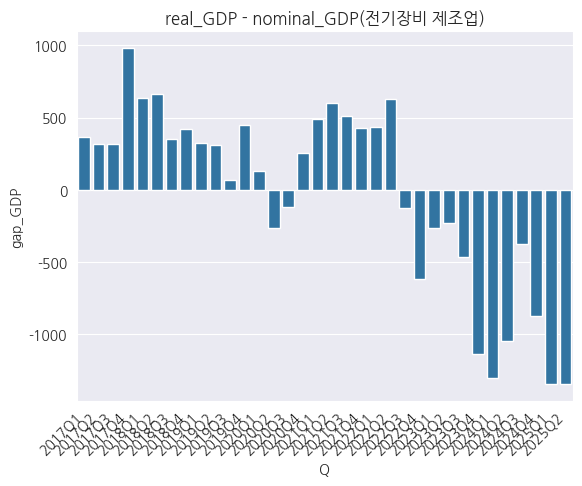

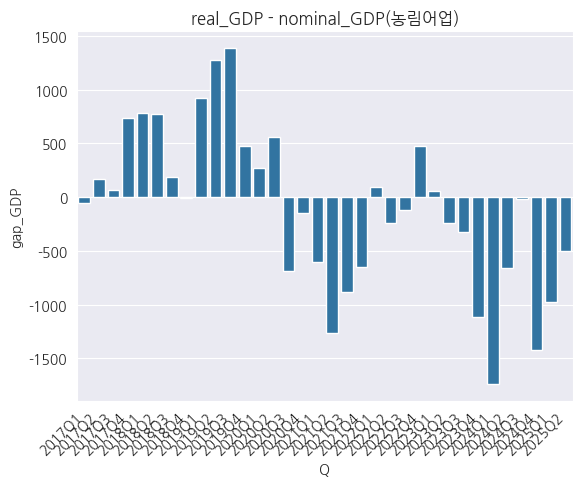

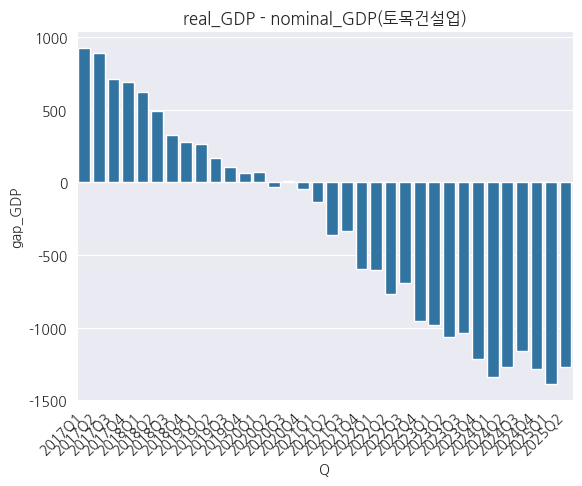

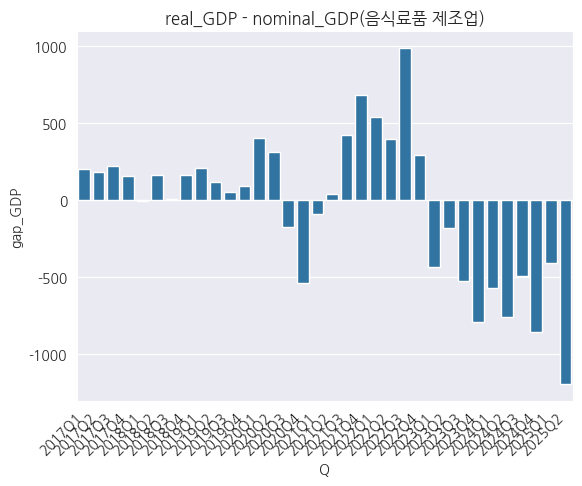

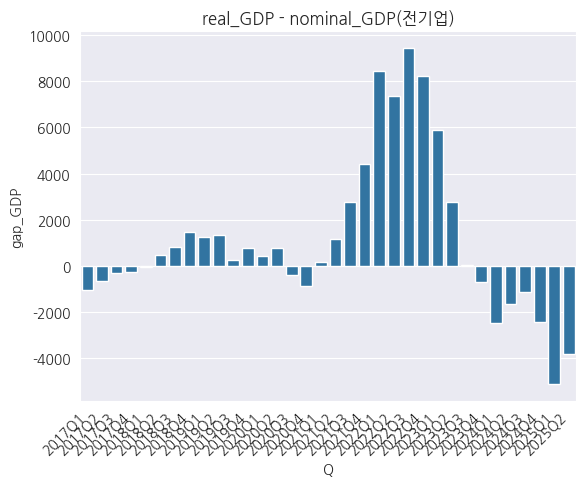

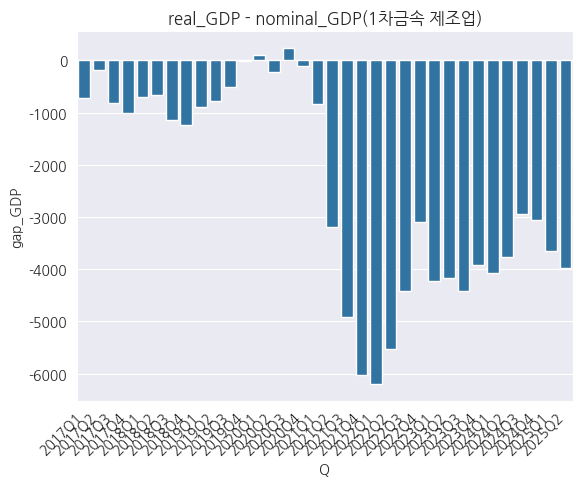

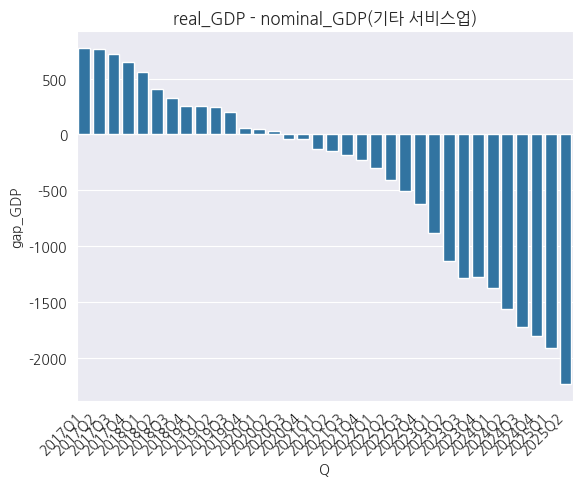

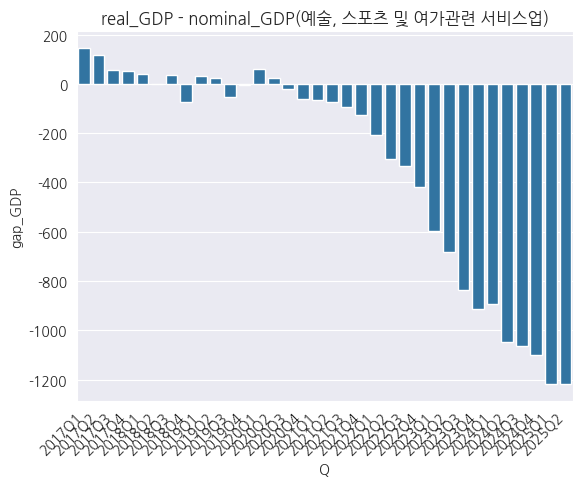

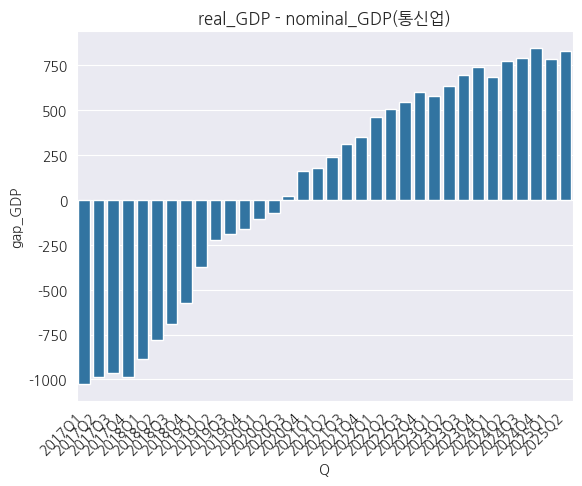

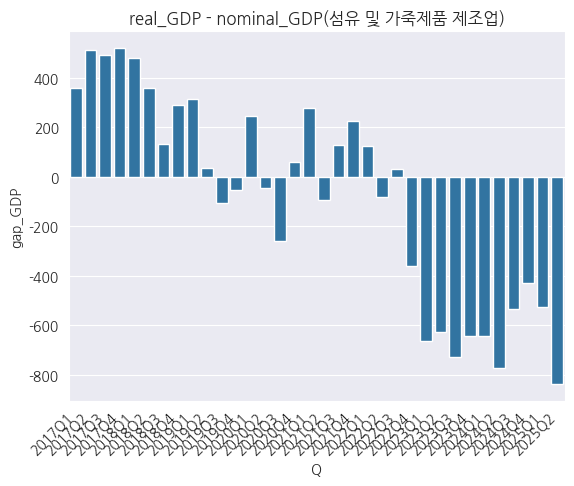

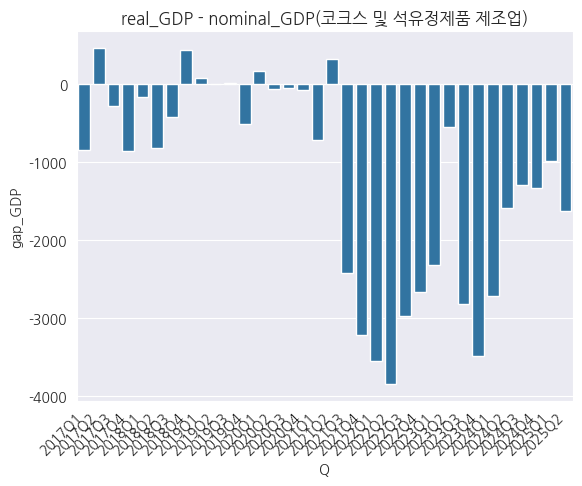

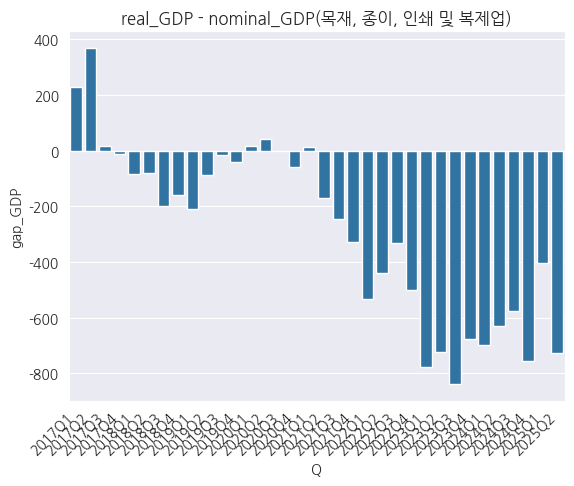

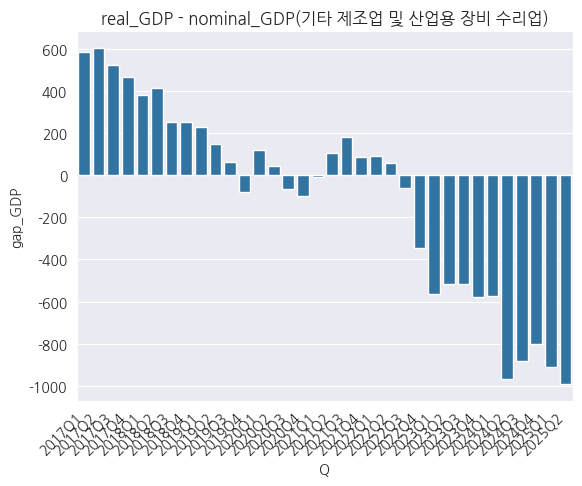

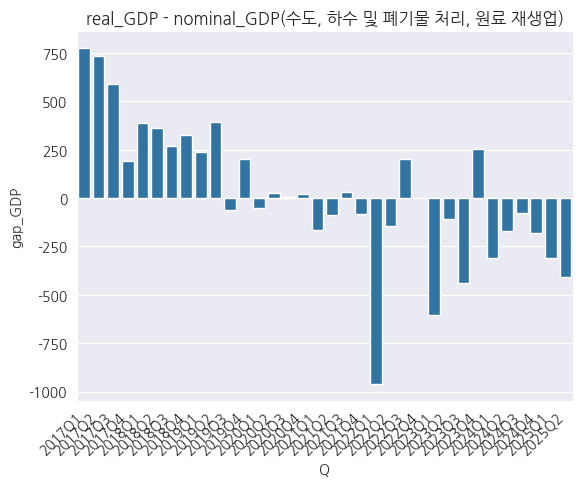

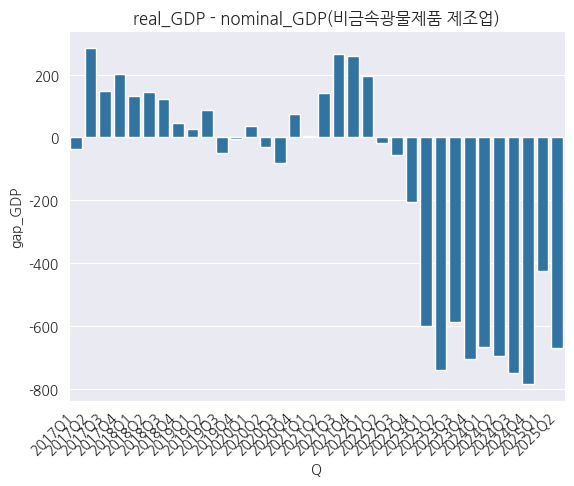

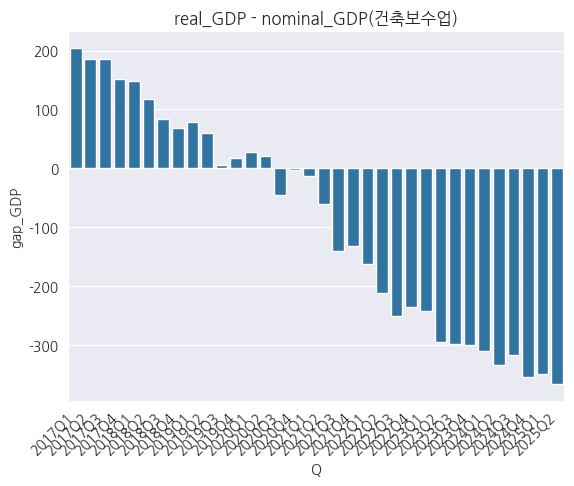

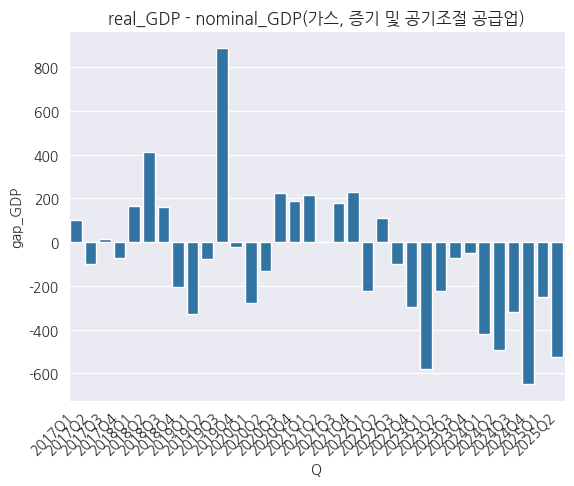

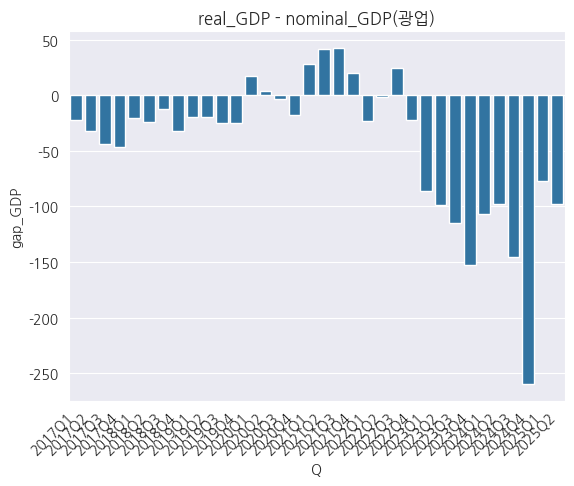

In [21]:
list_biz = df_comp_tot.sort_values(by='real_GDP', ascending=False)['var'].unique().tolist()
for biz in list_biz:
    sns.barplot(x='Q', y='gap_GDP', data=df_comp_tot[df_comp_tot['var'] == biz])
    plt.title(f'real_GDP - nominal_GDP({biz})')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [25]:
# df = api.get_statistic_table_list()
# df[df['통계명'].str.contains('경제활동별')]